# Pandas

* Pandas means roughly `panel data analysis`
* Its data is stored in numpy arrays, and many concepts are the same.  But a lot nicer interface for data analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
df.head()

In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,0.547182,0.465725,1.865571,0.601471
2013-01-05,1.519440,0.660269,-0.712028,-0.732525
2013-01-06,-0.721460,-0.257502,1.309546,0.436126


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
df.values

array([[ 0.54959149,  1.94523217, -2.25874788,  0.90802389],
       [-0.61135248, -0.75848297, -0.00452665,  0.10392358],
       [-0.09538914,  1.28398638,  0.9493802 , -1.36044371],
       [ 0.54718243,  0.4657254 ,  1.86557073,  0.60147073],
       [ 1.51944035,  0.66026863, -0.71202847, -0.73252469],
       [-0.72145999, -0.25750202,  1.30954621,  0.43612579]])

In [15]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.198002,0.556538,0.191532,-0.007237
std,0.845965,0.986773,1.515614,0.868834
min,-0.721460,-0.758483,-2.258748,-1.360444
25%,-0.482362,-0.076695,-0.535153,-0.523413
50%,0.225897,0.562997,0.472427,0.270025
75%,0.548989,1.128057,1.219505,0.560134
max,1.519440,1.945232,1.865571,0.908024


In [17]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.549591,-0.611352,-0.095389,0.547182,1.519440,-0.721460
B,1.945232,-0.758483,1.283986,0.465725,0.660269,-0.257502
C,-2.258748,-0.004527,0.949380,1.865571,-0.712028,1.309546
D,0.908024,0.103924,-1.360444,0.601471,-0.732525,0.436126


In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924
2013-01-06,-0.721460,-0.257502,1.309546,0.436126
2013-01-04,0.547182,0.465725,1.865571,0.601471
2013-01-05,1.519440,0.660269,-0.712028,-0.732525
2013-01-03,-0.095389,1.283986,0.949380,-1.360444
2013-01-01,0.549591,1.945232,-2.258748,0.908024


# Selection

In [19]:
df['A']

2013-01-01    0.549591
2013-01-02   -0.611352
2013-01-03   -0.095389
2013-01-04    0.547182
2013-01-05    1.519440
2013-01-06   -0.721460
Freq: D, Name: A, dtype: float64

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,0.549591,1.945232,-2.258748,0.908024
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924
2013-01-03,-0.095389,1.283986,0.949380,-1.360444


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924
2013-01-03,-0.095389,1.283986,0.949380,-1.360444
2013-01-04,0.547182,0.465725,1.865571,0.601471


In [22]:
df.loc[dates[0]]

A    0.549591
B    1.945232
C   -2.258748
D    0.908024
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[:,['A','B']]


,A,B
2013-01-01,0.549591,1.945232
2013-01-02,-0.611352,-0.758483
2013-01-03,-0.095389,1.283986
2013-01-04,0.547182,0.465725
2013-01-05,1.519440,0.660269
2013-01-06,-0.721460,-0.257502


In [24]:
df.loc[:,['A','B']]


,A,B
2013-01-01,0.549591,1.945232
2013-01-02,-0.611352,-0.758483
2013-01-03,-0.095389,1.283986
2013-01-04,0.547182,0.465725
2013-01-05,1.519440,0.660269
2013-01-06,-0.721460,-0.257502


In [25]:
df.loc['20130102',['A','B']]

A   -0.611352
B   -0.758483
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
df.loc[dates[0],'A']


0.5495914928353881

In [27]:
df.at[dates[0],'A']

0.5495914928353881

In [28]:
df.iloc[3]

A    0.547182
B    0.465725
C    1.865571
D    0.601471
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
df.iloc[3:5,0:2]


,A,B
2013-01-04,0.547182,0.465725
2013-01-05,1.519440,0.660269


In [30]:
df.iloc[3:5,0:2]


,A,B
2013-01-04,0.547182,0.465725
2013-01-05,1.519440,0.660269


In [31]:
df.iloc[3:5,0:2]


,A,B
2013-01-04,0.547182,0.465725
2013-01-05,1.519440,0.660269


In [32]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.945232,-2.258748
2013-01-02,-0.758483,-0.004527
2013-01-03,1.283986,0.949380
2013-01-04,0.465725,1.865571
2013-01-05,0.660269,-0.712028
2013-01-06,-0.257502,1.309546


In [33]:
df.iloc[1,1]


-0.7584829694522266

In [34]:
df.iloc[1,1]


-0.7584829694522266

In [35]:
df[df.A > 0]


,A,B,C,D
2013-01-01,0.549591,1.945232,-2.258748,0.908024
2013-01-04,0.547182,0.465725,1.865571,0.601471
2013-01-05,1.519440,0.660269,-0.712028,-0.732525


In [36]:
df[df > 0]


,A,B,C,D
2013-01-01,0.549591,1.945232,NaN,0.908024
2013-01-02,NaN,NaN,NaN,0.103924
2013-01-03,NaN,1.283986,0.949380,NaN
2013-01-04,0.547182,0.465725,1.865571,0.601471
2013-01-05,1.519440,0.660269,NaN,NaN
2013-01-06,NaN,NaN,1.309546,0.436126


In [39]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.549591,1.945232,-2.258748,0.908024,one
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924,one
2013-01-03,-0.095389,1.283986,0.949380,-1.360444,two
2013-01-04,0.547182,0.465725,1.865571,0.601471,three
2013-01-05,1.519440,0.660269,-0.712028,-0.732525,four
2013-01-06,-0.721460,-0.257502,1.309546,0.436126,three


In [41]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.549591,1.945232,-2.258748,0.908024,NaN
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924,1.0
2013-01-03,-0.095389,1.283986,0.949380,-1.360444,2.0
2013-01-04,0.547182,0.465725,1.865571,0.601471,3.0
2013-01-05,1.519440,0.660269,-0.712028,-0.732525,4.0
2013-01-06,-0.721460,-0.257502,1.309546,0.436126,5.0


In [42]:
df.at[dates[0],'A'] = 0


# Missing data
Missing data handling is one of the nicest features of pandas:

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.945232,-2.258748,0.908024,NaN,NaN
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924,1.0,NaN
2013-01-03,-0.095389,1.283986,0.949380,-1.360444,2.0,NaN
2013-01-04,0.547182,0.465725,1.865571,0.601471,3.0,NaN


In [45]:
df1.loc[dates[0]:dates[1],'E'] = 1


In [46]:
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924,1.0,1.0


In [47]:
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,1.945232,-2.258748,0.908024,5.0,1.0
2013-01-02,-0.611352,-0.758483,-0.004527,0.103924,1.0,1.0
2013-01-03,-0.095389,1.283986,0.949380,-1.360444,2.0,5.0
2013-01-04,0.547182,0.465725,1.865571,0.601471,3.0,5.0


In [ ]:
df1.fillna(value=5)


# Operations

Operations generally do the right things in the face of missing data!

In [48]:
df.mean()


A    0.106404
B    0.556538
C    0.191532
D   -0.007237
F    3.000000
dtype: float64

In [51]:
df.mean(axis=1)

2013-01-01    0.148627
2013-01-02   -0.054088
2013-01-03    0.555507
2013-01-04    1.295990
2013-01-05    0.947031
2013-01-06    1.153342
Freq: D, dtype: float64

# Time series

In [59]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26480
Freq: 5T, dtype: int64

In [60]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts_utc = ts.tz_localize('UTC')

In [61]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.281555
2012-03-06 19:00:00-05:00    1.223000
2012-03-07 19:00:00-05:00    0.636471
2012-03-08 19:00:00-05:00    1.168735
2012-03-09 19:00:00-05:00    0.195224
Freq: D, dtype: float64

In [62]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)


# Plotting
We'll do this later (day 3), but for now...

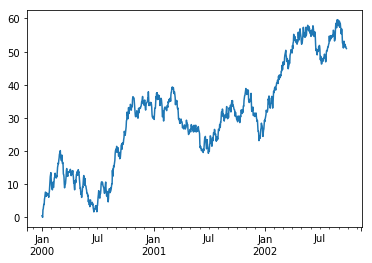

In [64]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

# Reading data in pandas
There is lots of support for automatically reading in data in various formats.  Let's use the same dataset as last time, and see what new we can do.

In [81]:
iris = pd.read_csv('../data/iris.data',
                   names=('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'type'))
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exercises 04
These exercises are taken with pride from https://github.com/ajcr/100-pandas-puzzles

## DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [83]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


**5.** Display a summary of the basic information about this DataFrame and its data.

**6.** Return the first 3 rows of the DataFrame `df`.

**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

**9.** Select only the rows where the number of visits is greater than 3.

**10.** Select the rows where the age is missing, i.e. is `NaN`.

**11.** Select the rows where the animal is a cat *and* the age is less than 3.

**12.** Select the rows the age is between 2 and 4 (inclusive).

**13.** Change the age in row 'f' to 1.5.

**14.** Calculate the sum of all visits (the total number of visits).

**15.** Calculate the mean age for each different animal in `df`.

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

**17.** Count the number of each type of animal in `df`.

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.